In [65]:
import pyhf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
df=pickle.load(open('processed.pkl','rb'))

In [66]:
df['SMHiggsToZZTo4L']['hzz2e2mu']

,hmass,z1,z2,weight,rle
0,127.204983,89.203033,27.516144,0.000251,1:156:46538
1,125.234140,90.285635,22.878929,0.000251,1:156:46548
2,124.515146,89.532225,32.973686,0.000251,1:156:46568
3,124.721181,90.901835,21.138948,0.000251,1:156:46589
4,125.586828,87.333601,30.304454,0.000251,1:156:46595
...,...,...,...,...,...
12725,127.199258,80.270245,36.456167,0.000251,1:996:298688
12726,124.950593,91.257318,11.630095,0.000251,1:996:298706
12727,123.230708,80.880271,37.709199,0.000251,1:996:298760
12728,123.295829,75.887761,42.418500,0.000251,1:996:298770


Text(0, 0.5, 'N events / 5 GeV')

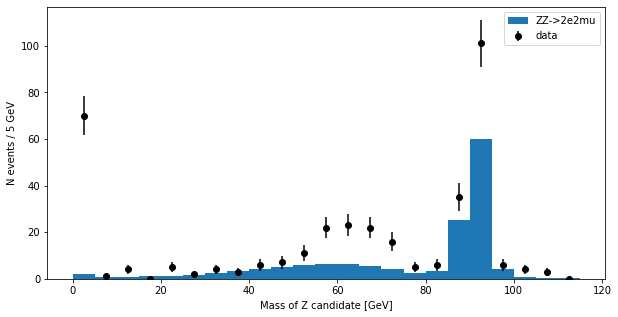

In [67]:
plt.rcParams['figure.figsize'] = [10,5]
bins = range(0,120,5)
binCenters=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

plt.hist(df['ZZTo2e2mu']['hzz2e2mu'].z1, weights=df['ZZTo2e2mu']['hzz2e2mu'].weight,bins=bins,label='ZZ->2e2mu')
dd = df['Run2012C_DoubleMuParked']['hzz2e2mu'].z1.tolist() + df['Run2012B_DoubleMuParked']['hzz2e2mu'].z1.tolist()+df['Run2012C_DoubleElectron']['hzz2e2mu'].z1.tolist() + df['Run2012B_DoubleElectron']['hzz2e2mu'].z1.tolist()
data = np.histogram(dd,bins=bins)
plt.errorbar(binCenters,data[0], yerr=np.sqrt(data[0]), fmt='o', c='black',label='data')
plt.legend()
plt.xlabel('Mass of Z candidate [GeV]')
plt.ylabel('N events / 5 GeV')

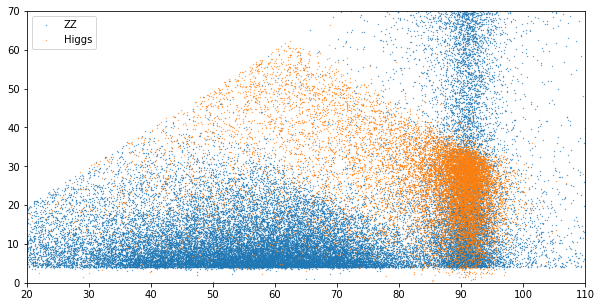

In [68]:
plt.scatter(df['ZZTo2e2mu']['hzz2e2mu'].z1,df['ZZTo2e2mu']['hzz2e2mu'].z2,s=0.1,label='ZZ')
plt.scatter(df['SMHiggsToZZTo4L']['hzz2e2mu'].z1,df['SMHiggsToZZTo4L']['hzz2e2mu'].z2,s=0.1,label='Higgs')
plt.xlim(20,110)
plt.ylim(0,70)
plt.legend()

In [69]:
df['ZZTo2e2mu']['hzz2e2mu']

,hmass,z1,z2,weight,rle
0,260.829710,89.063415,80.856726,0.001929,206859:1820:545809
1,0.000000,0.000000,0.000000,0.001929,206859:1820:545885
2,90.195278,59.561015,7.171288,0.001929,206859:1883:564513
3,86.934667,32.290873,5.910197,0.001929,206859:1883:564521
4,38.381415,20.542253,7.919962,0.001929,206859:1883:564532
...,...,...,...,...,...
77301,190.288968,88.674237,63.689012,0.001929,206859:1390:416724
77302,181.713253,92.862904,76.693911,0.001929,206859:1390:416765
77303,93.619307,69.089033,8.637663,0.001929,206859:1390:416783
77304,263.524712,88.637240,93.615268,0.001929,206859:1390:416793


In [70]:
xx = df['ZZTo2e2mu']['hzz2e2mu']
xx.loc[(xx.z1>70) & (xx.z1<120) & (xx.z2>12) & (xx.z2<120)]


,hmass,z1,z2,weight,rle
0,260.829710,89.063415,80.856726,0.001929,206859:1820:545809
8,220.133251,88.263270,96.942198,0.001929,206859:1886:565426
13,322.526534,90.320352,92.035472,0.001929,206859:1886:565511
14,267.733483,93.097202,85.338286,0.001929,206859:1886:565536
16,408.913120,90.943292,91.668117,0.001929,206859:1886:565573
...,...,...,...,...,...
77298,208.304297,92.873733,88.235616,0.001929,206859:1389:416675
77300,256.699379,91.783077,88.560759,0.001929,206859:1390:416719
77301,190.288968,88.674237,63.689012,0.001929,206859:1390:416724
77302,181.713253,92.862904,76.693911,0.001929,206859:1390:416765


Text(0, 0.5, 'N events / 5 GeV')

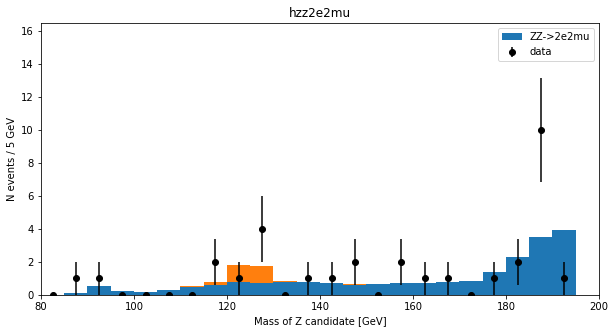

In [71]:
df_cut_ZZ2e2mu = df['ZZTo2e2mu']['hzz2e2mu'].loc[
                        (df['ZZTo2e2mu']['hzz2e2mu'].z1>70) & (df['ZZTo2e2mu']['hzz2e2mu'].z1<120) &
                        (df['ZZTo2e2mu']['hzz2e2mu'].z2>12) & (df['ZZTo2e2mu']['hzz2e2mu'].z2<120)]
df_cut_SMH2e2mu = df['SMHiggsToZZTo4L']['hzz2e2mu'].loc[
                        (df['SMHiggsToZZTo4L']['hzz2e2mu'].z1>70) & (df['SMHiggsToZZTo4L']['hzz2e2mu'].z1<120) &
                        (df['SMHiggsToZZTo4L']['hzz2e2mu'].z2>12) & (df['SMHiggsToZZTo4L']['hzz2e2mu'].z2<120)]
df_cut_C_Mu = df['Run2012C_DoubleMuParked']['hzz2e2mu'].loc[
                        (df['Run2012C_DoubleMuParked']['hzz2e2mu'].z1>70) & (df['Run2012C_DoubleMuParked']['hzz2e2mu'].z1<120) & 
                        (df['Run2012C_DoubleMuParked']['hzz2e2mu'].z2>12) & (df['Run2012C_DoubleMuParked']['hzz2e2mu'].z2<120)]
df_cut_B_Mu = df['Run2012B_DoubleMuParked']['hzz2e2mu'].loc[
                        (df['Run2012B_DoubleMuParked']['hzz2e2mu'].z1>70) & (df['Run2012B_DoubleMuParked']['hzz2e2mu'].z1<120) & 
                        (df['Run2012B_DoubleMuParked']['hzz2e2mu'].z2>12) & (df['Run2012B_DoubleMuParked']['hzz2e2mu'].z2<120)]
df_cut_C_El = df['Run2012C_DoubleElectron']['hzz2e2mu'].loc[
                        (df['Run2012C_DoubleMuParked']['hzz2e2mu'].z1>70) & (df['Run2012C_DoubleMuParked']['hzz2e2mu'].z1<120) & 
                        (df['Run2012C_DoubleElectron']['hzz2e2mu'].z2>12) & (df['Run2012C_DoubleElectron']['hzz2e2mu'].z2<120)]
df_cut_B_El = df['Run2012B_DoubleElectron']['hzz2e2mu'].loc[
                        (df['Run2012B_DoubleElectron']['hzz2e2mu'].z1>70) & (df['Run2012B_DoubleMuParked']['hzz2e2mu'].z1<120) & 
                        (df['Run2012B_DoubleElectron']['hzz2e2mu'].z2>12) & (df['Run2012B_DoubleElectron']['hzz2e2mu'].z2<120)]                

bins = range(60,200,5)
binCenters=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

plt.hist([df_cut_ZZ2e2mu.hmass, df_cut_SMH2e2mu.hmass], 
            weights=[df_cut_ZZ2e2mu.weight, df_cut_SMH2e2mu.weight],bins=bins, stacked=True,label='ZZ->2e2mu')
            
zz = np.histogram(df_cut_ZZ2e2mu.hmass, weights=df_cut_ZZ2e2mu.weight, bins=bins)
higgs = np.histogram(df_cut_SMH2e2mu.hmass, weights=df_cut_SMH2e2mu.weight, bins=bins)

dd =    df_cut_C_Mu.hmass.tolist() + df_cut_B_Mu.hmass.tolist()+ \
        df_cut_C_El.hmass.tolist() + df_cut_B_El.hmass.tolist()
data = np.histogram(dd,bins=bins)
plt.errorbar(binCenters,data[0], yerr=np.sqrt(data[0]), fmt='o', c='black',label='data')
plt.legend()
plt.xlim(80,200)
plt.ylim(0,16.5)
plt.title("hzz2e2mu")
plt.xlabel('Mass of Z candidate [GeV]')
plt.ylabel('N events / 5 GeV')

<ErrorbarContainer object of 3 artists>

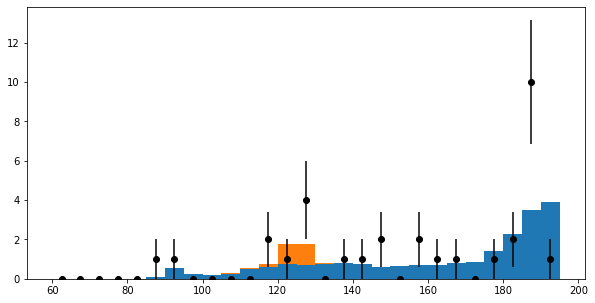

In [72]:
plt.bar(binCenters,zz[0], width=binCenters[1]-binCenters[0])
plt.bar(binCenters, higgs[0], bottom=zz[0], width=binCenters[1]-binCenters[0])
plt.errorbar(binCenters, data[0],yerr=np.sqrt(data[0]),fmt="o",c='black')

In [73]:

spec = {
        "channels": [
            {
                "name": "singlechannel",
                "samples": [
                    {
                        "name": "signal",
                        "data": higgs[0].tolist(),
                        "modifiers": [
                            {"name": "mu", "type": "normfactor", "data": None}
                        ],
                    },
                    {
                        "name": "background",
                        "data": zz[0].tolist(),
                        "modifiers": [
                            {"name": "mu_bg", "type": "normfactor", "data": None}
                        ],
                    },
                ],
            }
        ],
    "observations": [{
            "name": "singlechannel",
            "data": data[0].tolist()
        }
    ],
    "measurements": [
        {
            "name": "Measurement",
            "config": {
                "poi": "mu",
                "parameters": []
            }
        }
    ],
    "version": "1.0.0"
}
workspace = pyhf.Workspace(spec)
pdf = workspace.model(measurement_name='Measurement')
newdata = workspace.data(pdf)
workspace.get_measurement(measurement_name='Measurement')
print(f'Samples:\n {pdf.config.samples}')
print(f'Parameters:\n {pdf.config.parameters}')

Samples:
 ['background', 'signal']
Parameters:
 ['mu', 'mu_bg']


In [74]:
best_fit = pyhf.infer.mle.fit(newdata, pdf)
best_fit


array([1.26164845, 1.56723254])

In [75]:
print(data[0])

[ 0  0  0  0  0  1  1  0  0  0  0  2  1  4  0  1  1  2  0  2  1  1  0  1
  2 10  1]


<ErrorbarContainer object of 3 artists>

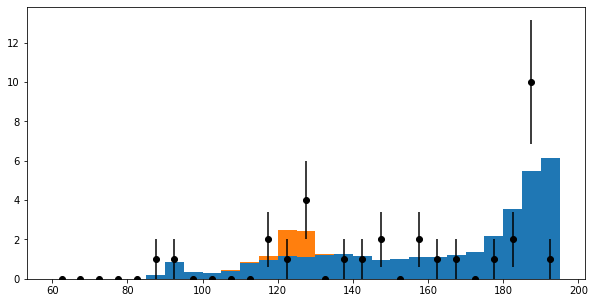

In [76]:
plt.bar(binCenters,[best_fit[1]*i for i in zz[0]], width=binCenters[1]-binCenters[0])
plt.bar(binCenters, [best_fit[0]*i for i in higgs[0]], bottom=[best_fit[1]*i for i in zz[0]], width=binCenters[1]-binCenters[0])
plt.errorbar(binCenters, data[0],yerr=np.sqrt(data[0]),fmt="o",c='black')

In [77]:
#plt.bar(bdata['bins'],[best_fit[1]*i for i in bdata['ZZ']],width=bdata['bins'][1]-bdata['bins'][0])
#plt.bar(bdata['bins'],[best_fit[0]*i for i in bdata['hig']],bottom=[best_fit[1]*i for i in bdata['ZZ']],width=bdata['bins'][1]-bdata['bins'][0])
#plt.errorbar(bdata['bins'],bdata['data'][0],yerr=np.sqrt(bdata['data'][0]),fmt="o",c='black')

Text(0, 0.5, 'N events / 5 GeV')

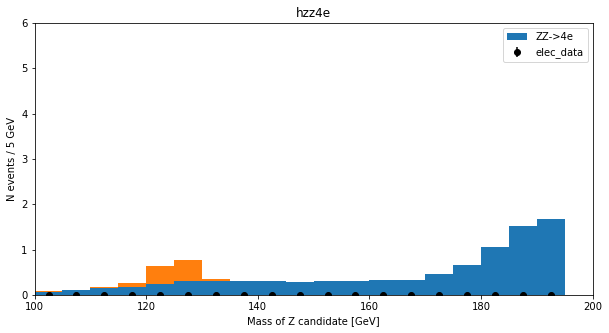

In [78]:
df_cut_ZZ4e = df['ZZTo4e']['hzz4e'].loc[
                        (df['ZZTo4e']['hzz4e'].z1>70) & (df['ZZTo4e']['hzz4e'].z1<120) &
                        (df['ZZTo4e']['hzz4e'].z2>12) & (df['ZZTo4e']['hzz4e'].z2<120)]
df_cut_SMH4e = df['SMHiggsToZZTo4L']['hzz4e'].loc[
                        (df['SMHiggsToZZTo4L']['hzz4e'].z1>70) & (df['SMHiggsToZZTo4L']['hzz4e'].z1<120) &
                        (df['SMHiggsToZZTo4L']['hzz4e'].z2>12) & (df['SMHiggsToZZTo4L']['hzz4e'].z2<120)]
df_cut_C_Mu_4e = df['Run2012C_DoubleMuParked']['hzz4e'].loc[
                        (df['Run2012C_DoubleMuParked']['hzz4e'].z1>70) & (df['Run2012C_DoubleMuParked']['hzz4e'].z1<120) & 
                        (df['Run2012C_DoubleMuParked']['hzz4e'].z2>12) & (df['Run2012C_DoubleMuParked']['hzz4e'].z2<120)]
df_cut_B_Mu_4e = df['Run2012B_DoubleMuParked']['hzz4e'].loc[
                        (df['Run2012B_DoubleMuParked']['hzz4e'].z1>70) & (df['Run2012B_DoubleMuParked']['hzz4e'].z1<120) & 
                        (df['Run2012B_DoubleMuParked']['hzz4e'].z2>12) & (df['Run2012B_DoubleMuParked']['hzz4e'].z2<120)]
df_cut_C_El_4e = df['Run2012C_DoubleElectron']['hzz4e'].loc[
                        (df['Run2012C_DoubleMuParked']['hzz4e'].z1>70) & (df['Run2012C_DoubleMuParked']['hzz4e'].z1<120) & 
                        (df['Run2012C_DoubleElectron']['hzz4e'].z2>12) & (df['Run2012C_DoubleElectron']['hzz4e'].z2<120)]
df_cut_B_El_4e = df['Run2012B_DoubleElectron']['hzz4e'].loc[
                        (df['Run2012B_DoubleElectron']['hzz4e'].z1>70) & (df['Run2012B_DoubleMuParked']['hzz4e'].z1<120) & 
                        (df['Run2012B_DoubleElectron']['hzz4e'].z2>12) & (df['Run2012B_DoubleElectron']['hzz4e'].z2<120)] 

plt.rcParams['figure.figsize'] = [10,5]
bins = range(60,200,5)
binCenters=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

plt.hist([df_cut_ZZ4e.hmass, df_cut_SMH4e.hmass], 
            weights=[df_cut_ZZ4e.weight, df_cut_SMH4e.weight],bins=bins, stacked=True,label='ZZ->4e')
            
ezz = np.histogram(df_cut_ZZ4e.hmass, weights=df_cut_ZZ4e.weight, bins=bins)
ehiggs = np.histogram(df_cut_SMH4e.hmass, weights=df_cut_SMH4e.weight, bins=bins)

edd =   df_cut_C_Mu_4e.hmass.tolist() + df_cut_B_Mu_4e.hmass.tolist()+ \
        df_cut_C_El_4e.hmass.tolist() + df_cut_B_El_4e.hmass.tolist()
        
edata = np.histogram(edd,bins=bins)

plt.errorbar(binCenters,edata[0], yerr=np.sqrt(edata[0]), fmt='o', c='black',label='elec_data')
plt.legend()
plt.xlim(100,200)
plt.ylim(0,6)
plt.title("hzz4e")
plt.xlabel('Mass of Z candidate [GeV]')
plt.ylabel('N events / 5 GeV')

In [83]:

spec = {
        "channels": [
            {
                "name": "singlechannel",
                "samples": [
                    {
                        "name": "signal",
                        "data": ehiggs[0].tolist(),
                        "modifiers": [
                            {"name": "mu", "type": "normfactor", "data": None}
                        ],
                    },
                    {
                        "name": "background",
                        "data": ezz[0].tolist(),
                        "modifiers": [
                            {"name": "mu_bg", "type": "normfactor", "data": None}
                        ],
                    },
                ],
            }
        ],
    "observations": [{
            "name": "singlechannel",
            "data": edata[0].tolist()
        }
    ],
    "measurements": [
        {
            "name": "Measurement",
            "config": {
                "poi": "mu",
                "parameters": []
            }
        }
    ],
    "version": "1.0.0"
}
workspace = pyhf.Workspace(spec)
pdf = workspace.model(measurement_name='Measurement')
enewdata = workspace.data(pdf)
workspace.get_measurement(measurement_name='Measurement')
print(f'Samples:\n {pdf.config.samples}')
print(f'Parameters:\n {pdf.config.parameters}')

Samples:
 ['background', 'signal']
Parameters:
 ['mu', 'mu_bg']


In [84]:
ebest_fit = pyhf.infer.mle.fit(enewdata, pdf)
ebest_fit

array([0., 0.])

<ErrorbarContainer object of 3 artists>

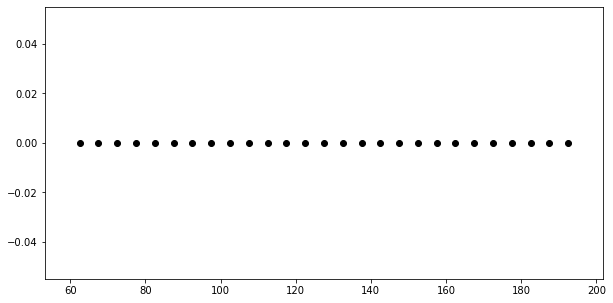

In [85]:
plt.bar(binCenters,[ebest_fit[1]*i for i in ezz[0]], width=binCenters[1]-binCenters[0])
plt.bar(binCenters, [ebest_fit[0]*i for i in ehiggs[0]], bottom=[ebest_fit[1]*i for i in ezz[0]], width=binCenters[1]-binCenters[0])
plt.errorbar(binCenters, edata[0],yerr=np.sqrt(edata[0]),fmt="o",c='black')

Text(0, 0.5, 'N events / 5 GeV')

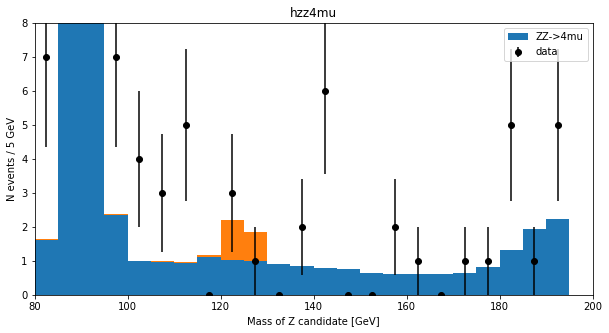

In [79]:
plt.rcParams['figure.figsize'] = [10,5]
bins = range(60,200,5)
binCenters=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

plt.hist([df['ZZTo4mu']['hzz4mu'].hmass, df['SMHiggsToZZTo4L']['hzz4mu'].hmass], 
            weights=[df['ZZTo4mu']['hzz4mu'].weight, df['SMHiggsToZZTo4L']['hzz4mu'].weight],bins=bins, stacked=True,label='ZZ->4mu')
dd =    df['Run2012C_DoubleMuParked']['hzz4mu'].hmass.tolist() + df['Run2012B_DoubleMuParked']['hzz4mu'].hmass.tolist()+ \
        df['Run2012C_DoubleElectron']['hzz4mu'].hmass.tolist() + df['Run2012B_DoubleElectron']['hzz4mu'].hmass.tolist()
data = np.histogram(dd,bins=bins)
plt.errorbar(binCenters,data[0], yerr=np.sqrt(data[0]), fmt='o', c='black',label='data')
plt.legend()
plt.xlim(80,200)
plt.ylim(0,8)
plt.title("hzz4mu")
plt.xlabel('Mass of Z candidate [GeV]')
plt.ylabel('N events / 5 GeV')

In [80]:
"""def sigScL(s,b,o):
    return np.sqrt(2*o*np.log(1+s/b)-2*s)"""

'def sigScL(s,b,o):\n    return np.sqrt(2*o*np.log(1+s/b)-2*s)'